![Matplotlib](assets/matplotlib-logo.svg)

# Making plots

A key aspect of exploring data is the ability to visualize it, e.g. by making plots. A key library for doing this is [matplotlib](https://matplotlib.org).
This library allows one to make and customize a variety of plot styles including basic histograms, scatter plots, bar charts, line plots and many more. Complete
documentation can be found via the following links:

  * [Matplotlib Quick Start Guide](https://matplotlib.org/stable/users/explain/quick_start.html)
  * [Matplotlib User Guide](https://matplotlib.org/stable/users/index.html)
  * [Matplotlib Named Colors](https://matplotlib.org/stable/gallery/color/named_colors.html)
  * [Matplotlib Colormaps](https://matplotlib.org/stable/users/explain/colors/colormaps.html)
  * [mplhep HEP style customizations](https://mplhep.readthedocs.io/en/latest/)

And of course there are many, many other tutorials on the web and in Youtube for various levels of expertise.

Here we give some basic examples that may be useful for the exercises. Explore further possibilities through the links above!

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Simple Plot

For simple line plots:

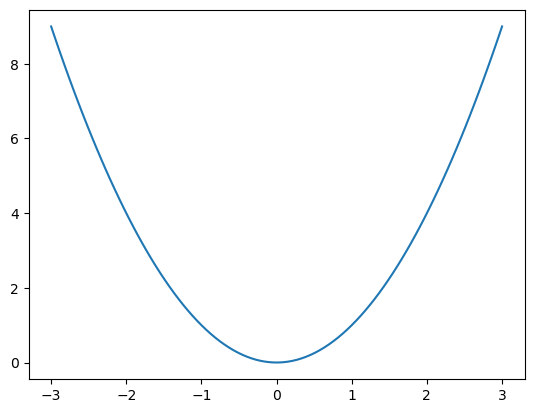

In [18]:
x = np.linspace(-3,3,100)
y=x**2
plt.plot(x,y);

## Histogram

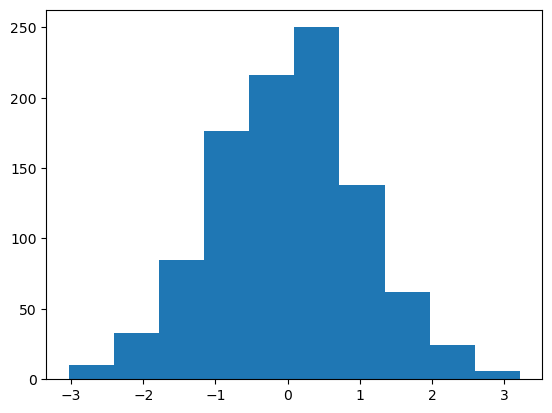

In [19]:
values = np.random.normal(size=1000)
plt.hist(values);

You can also specify the binning:

bins = array([-4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,
        1.5,  2. ,  2.5,  3. ,  3.5,  4. ])


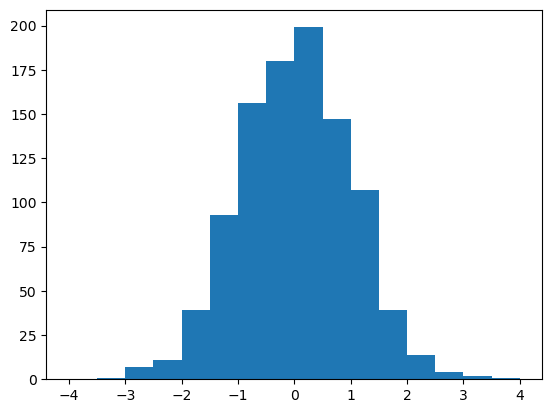

In [20]:
values = np.random.normal(size=1000)
bins = np.linspace(-4,4,17)
print(f'{bins = }')
plt.hist(values, bins=bins);

You can overlay more than one distribution:

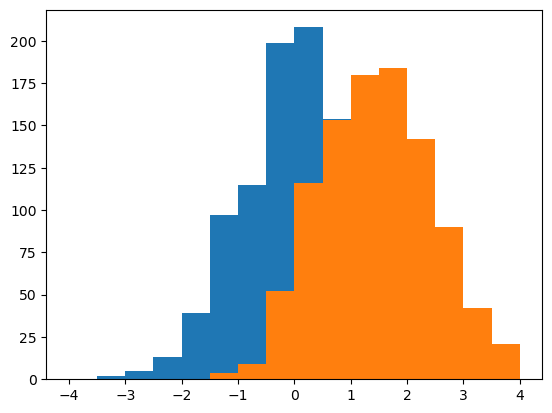

In [21]:
values1 = np.random.normal(size=1000)
values2 = np.random.normal(loc=1.5, size=1000)
bins = np.linspace(-4,4,17)
plt.hist(values1, bins=bins)
plt.hist(values2, bins=bins);

Matplotlib will cycle through the following colors (in hex/rgb format):

In [6]:
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
print(colors)

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


but you can also choose [different colors](https://matplotlib.org/stable/gallery/color/named_colors.html) and specify them both
by name and by hex/rgb code:

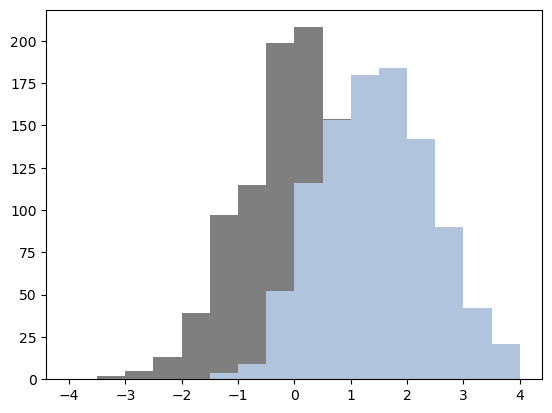

In [22]:
plt.hist(values1, bins=bins, color='#7f7f7f')
plt.hist(values2, bins=bins, color='lightsteelblue');

## Scatter plots

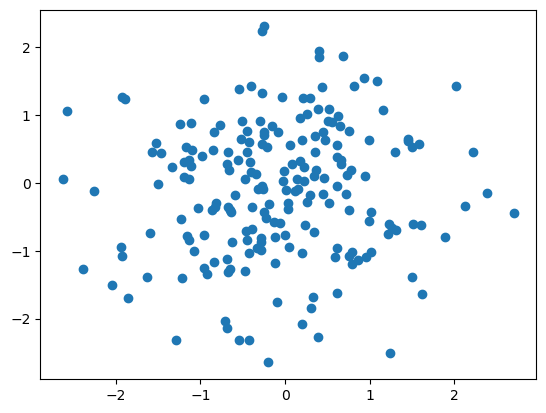

In [23]:
x = np.random.normal(size=200)
y = np.random.normal(size=200)
plt.scatter(x,y);

The axis limits are determined automatically based on the data. You can also specify these explicitly

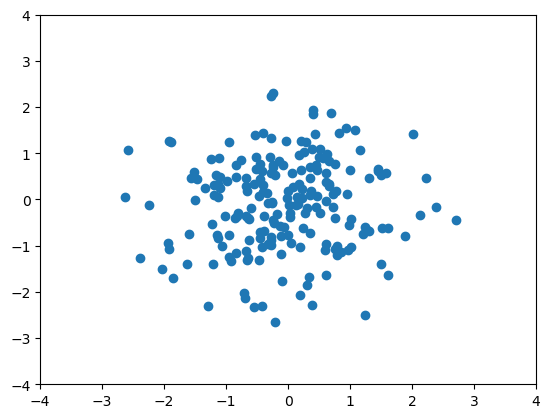

In [24]:
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.scatter(x,y);

You can also specify different colors, change marker sizes and other things:

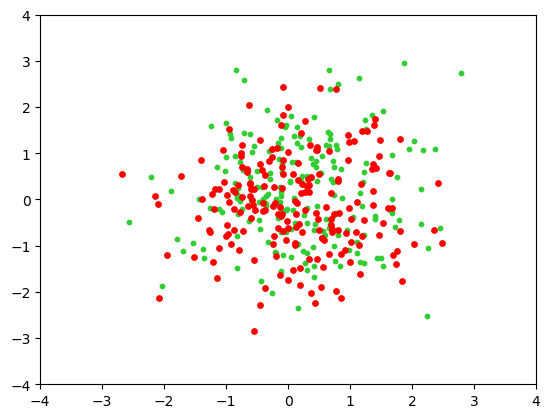

In [25]:
x_bad = np.random.normal(size=200)
y_bad = np.random.normal(size=200)
x_good = np.random.normal(size=200)
y_good = np.random.normal(size=200)
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.scatter(x_good,y_good, color='limegreen',s=10)
plt.scatter(x_bad,y_bad, color='red',s=15);

You can also add horizontal and vertical lines:

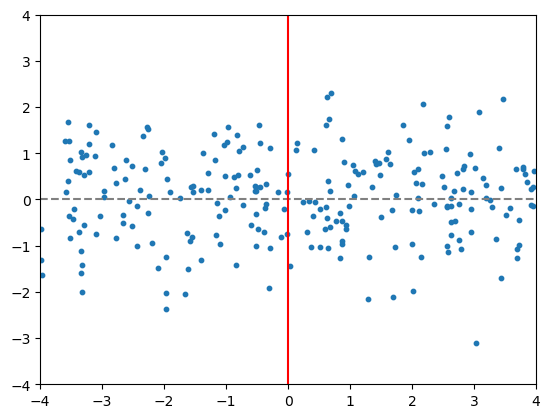

In [26]:
x = 8.0*np.random.random(size=250) - 4.0
y = np.random.normal(size=250)
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.scatter(x,y,s=10)
plt.axhline(y=0,color='gray',linestyle='--')
plt.axvline(x=0, color='red', linestyle='-')
plt.show()

## Images (2D Array Data)

In matplotlib, 2 dimensional (2D) data can be visualized using the ``imshow()'' plotting option. Here the 2D data is organized as a 2D array of values. For example:

In [27]:
board = np.arange(0,64).reshape(8,8)
print(board)

[[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23]
 [24 25 26 27 28 29 30 31]
 [32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47]
 [48 49 50 51 52 53 54 55]
 [56 57 58 59 60 61 62 63]]


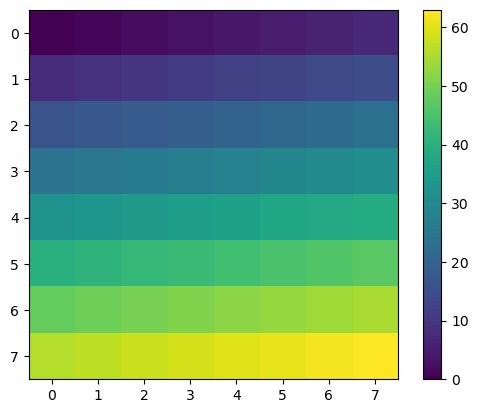

In [28]:
plt.imshow(board)
plt.colorbar()
plt.show()

What ``imshow()`` has done is to take the full range of values from the array and map them to a "colormap". A colormap is a range of colors, here from dark blue to yellow, with mixes like greens in the middle. The default colormap (if we do not tell ``imshow()`` otherwise) is called "viridis". You can choose other [colormaps](https://matplotlib.org/stable/users/explain/colors/colormaps.html) and specify them like this:

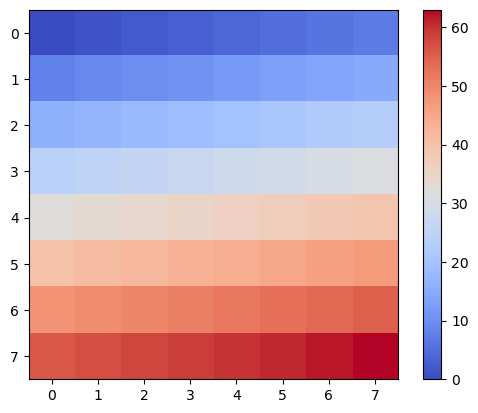

In [29]:
plt.imshow(board, cmap='coolwarm')
plt.colorbar()
plt.show()

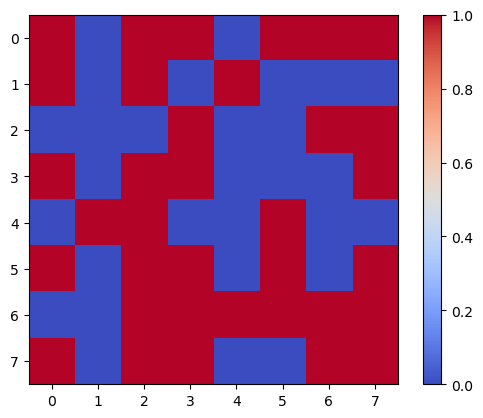

In [30]:
board = np.random.randint(0,2,64).reshape(8,8) # here randint generates 64 random ints in the range [0,2)
plt.imshow(board, cmap='coolwarm')
plt.colorbar()
plt.show()

## Bar Plots

Bar plots are also possible, with non-numeric labels. Here we demonstrate also passing a list of colors for the different
bars and rotation of the x tick labels.

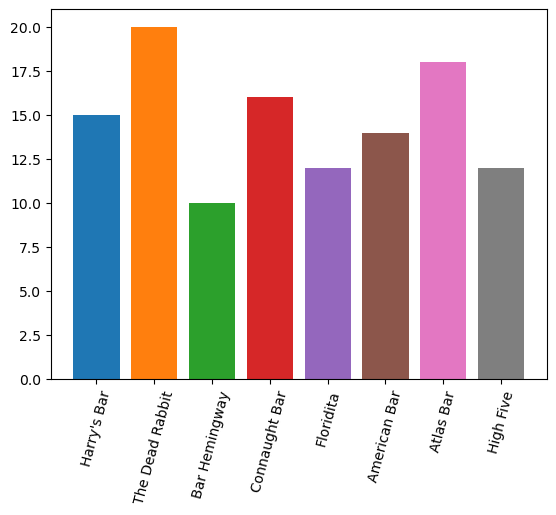

In [40]:
bars = ["Harry's Bar", "The Dead Rabbit", "Bar Hemingway", "Connaught Bar", "Floridita",
        "American Bar", "Atlas Bar", "High Five"
]
barstools = [15, 20, 10, 16, 12, 14, 18, 12]
plt.xticks(rotation=75) # Since the names are long we rotate them 75 degrees
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',  '#9467bd', '#8c564b',
          '#e377c2', '#7f7f7f',  '#bcbd22', '#17becf'] # more than needed
plt.bar(bars,barstools,color=colors);

## Pie Charts

While less commonly used in Physics, sometimes it is useful to use a pie chart.

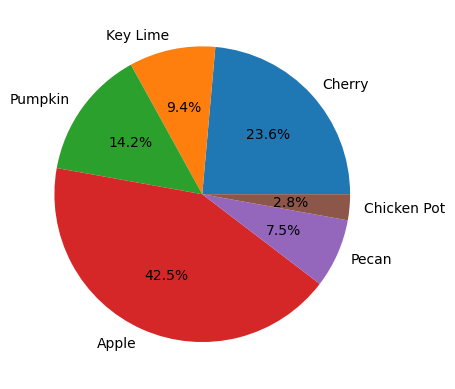

In [32]:
# Number of pies sold 
labels = ['Cherry','Key Lime','Pumpkin','Apple','Pecan','Chicken Pot']
numbers = [25, 10, 15, 45, 8, 3]
plt.pie(numbers, labels=labels,autopct='%1.1f%%'); # autopct adds percentages

# Subplots

It is also possible to make grid-like arrays of plots using the ``subplots()`` function.
Here we make a 2x2 array of some of the previous plot examples above.

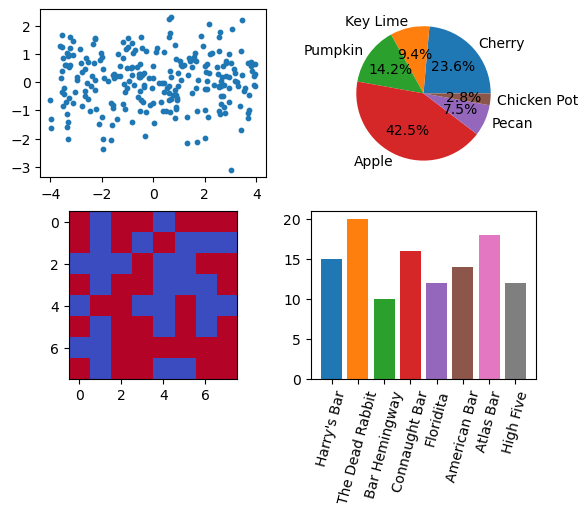

In [53]:
fig, axs = plt.subplots(2,2)
# reusing data defined for the plots above
axs[0,0].scatter(x,y,s=10)
axs[0,1].pie(numbers, labels=labels,autopct='%1.1f%%')
axs[1,0].imshow(board, cmap='coolwarm')
axs[1,1].tick_params(axis='x', rotation=75) 
axs[1,1].bar(bars,barstools,color=colors);

## Customizing Labels, Styles, Subplots, Axes

#### Things to include (TODO)

  * plt.figure(figsize(10,6))
  * plt.xlabel() and ylabel()
  * plt.title()
  * plt.legend()
  * imshow, note row/column vs x/y? 

[6.4 4.8]


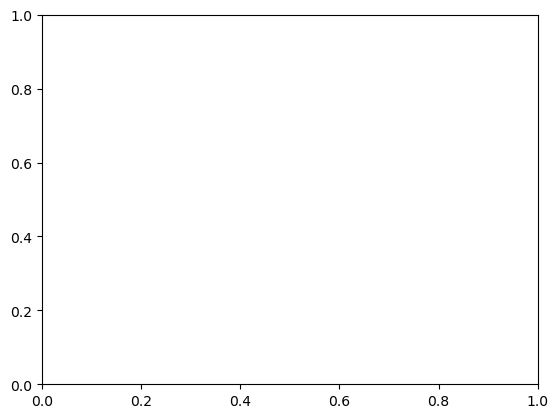

In [41]:
fig,ax = plt.subplots()
print(fig.get_size_inches())

## Style Customization for High Energy Physics

The [mplhep package](https://github.com/scikit-hep/mplhep) provides functionality to customize plots to the styles used
by the LHC experiments and ROOT. See the [documentation](https://mplhep.readthedocs.io/en/latest/) for more information.